# NLP project

Sentiment analysis is a task to identify the sentiment of customers using reviews given by them.
In this project, the sentiment analysis problem of customers using office products on Amazon
website has been handled using two approaches. In order to build models of this approaches
customers’ reviews, summaries, and ratings are used as input data and model evaluation is done
with the help of different performance measures of multi-class classification.

## 1. Dataset data exploration:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
#Loaded office_products review dataset as assigned to Team 4

df = pd.read_json('C:/Abhi/sem4/NLP & Recommender System/Group project/Office_Products_5.json', lines=True)

In [3]:
#Checking column names, data types and shape of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53258 entries, 0 to 53257
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      53258 non-null  object
 1   asin            53258 non-null  object
 2   reviewerName    52799 non-null  object
 3   helpful         53258 non-null  object
 4   reviewText      53258 non-null  object
 5   overall         53258 non-null  int64 
 6   summary         53258 non-null  object
 7   unixReviewTime  53258 non-null  int64 
 8   reviewTime      53258 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
#Checking NUll values in dataset

df.isnull().sum()

reviewerID          0
asin                0
reviewerName      459
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [5]:
#Total number of unique products in the dataset

df['asin'].nunique() 

2420

In [6]:
#Total number of unique reviewers in the dataset

df['reviewerID'].nunique() 

4905

In [7]:
#Function to return length of the String

def max_length(text):
    return len(text)

In [8]:
#Applied above function on each row of column 'reviewText' to find length of the reviews 
df['len_review'] = df.apply(lambda row: max_length(row['reviewText']), axis=1)

max_len_reviewid = df['len_review'].argmax()
max_len_review = df.iloc[max_len_reviewid]

print(f'index of longest review in the dataset : {max_len_reviewid} \n\n')

index of longest review in the dataset : 19406 




In [9]:
##Applied above function on each row of column 'summary' to find length of the reviews 

df['len_summary'] = df.apply(lambda row: max_length(row['summary']), axis=1)
max_len_summaryid = df['len_summary'].argmax()
max_len_summary = df.iloc[max_len_summaryid]

print(f'Longest Summary in the dataset: {max_len_summaryid} \n\n')
max_len_summary['reviewText'] #Longest summary


Longest Summary in the dataset: 6304 




"Obviously this pen is not a very expensive fountain pen that is a 'showpiece', rather it is an everyday pen that should survive daily use and is a replacement for a ballpoint or rollerball pen. It takes a bit of use to get formalized to using a fountain pen and sometimes you may find it skipping especially when it has air pockets in the chamber or you're at a strange angle. This is expected but that is the fun and uniqueness of using such a pen. It is plastic but very sold (not weight wise but feel wise). The clip is large but this is a good thing if you carry it in your pocket and want it to be secure. The nib is a fine nib but from reading other sites, it seems as if the size is closer to a medium. (Japan nibs vs. German?). Whatever; the script is very close to my other nibs labeled as medium. This is a very good everyday thickness; not too fine and not too broad. The one cartridge it comes with is BLUE. I would recommend buying a good bottle of ink and a Z24 converter. This up fron

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of length of the reiviewText')

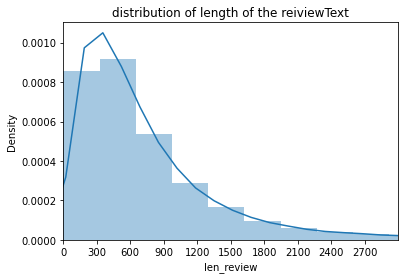

In [10]:

fig, ax = plt.subplots()

sns.distplot(df['len_review'], bins=100)
ax.set_xlim(1,3000)
ax.set_xticks(range(0,3000,300))
plt.title('distribution of length of the reiviewText')

'''
The graph above shows the length of reviews in the dataset and how the length of
sentences is distributed.
It can be noticed that most of the reviews are 200-400 characters long. The number of
reviews is decreasing as the total number of characters are increasing in the review sentence.
'''

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of length of the Summary')

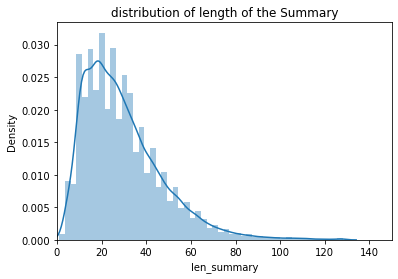

In [11]:

fig, ax = plt.subplots()

sns.distplot(df['len_summary'])
ax.set_xlim(1,150)
ax.set_xticks(range(0,150,20))
plt.title('distribution of length of the Summary')

'''
Same way, the graph above represents the length of the summary in the dataset
and how the length of summaries is distributed.
It can be noted that most of the summaries are 10-30 characters long. The number of
summaries is decreasing as the total number of characters is increasing
'''

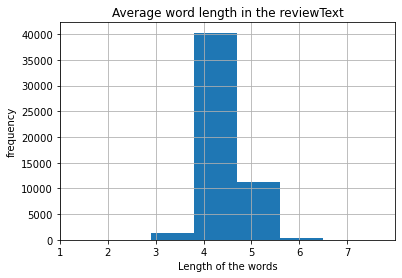

In [13]:
hold = df['reviewText'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
 
fig, ax = plt.subplots()

hold.hist()
ax.set_xlim(1,8)
ax.set_xticks(range(1,8,1))
plt.title('Average word length in the reviewText')
plt.xlabel('Length of the words')
plt.ylabel('frequency')
plt.show()

'''
The Histogram above shows that 40,000 words are 4-5 characters long and 10,000 words
are 5-6 characters long
'''

In [14]:
#Dropping columns that created to get some insights
df.drop(['len_review', 'len_summary'], axis=1, inplace= True)


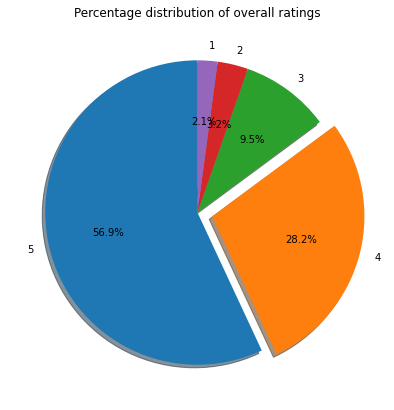

In [15]:
overall_count =df['overall'].value_counts()

overall_count =pd.DataFrame(overall_count)
plt.figure(figsize = (7,7))
plt.pie( overall_count.overall,
        labels = [5,4,3,2,1],
        #colors = ['c','m','r','b'],
        startangle=90,
        shadow = True,
        explode=(0,0.1,0,0,0),
        autopct='%1.1f%%'
         )
plt.title("Percentage distribution of overall ratings")
plt.show()

'''
The pie chart above represents the percentage of each rating in the dataset.
Rating 5 has the maximum part in the dataset with around 57% and the second major part
is rating 4 with 28.2%. The remaining percentages are divided among ratings 1, 2, and 3.
Hence, it can be inferred that ratings are not divided equally, and the dataset is not totally
balanced.
'''

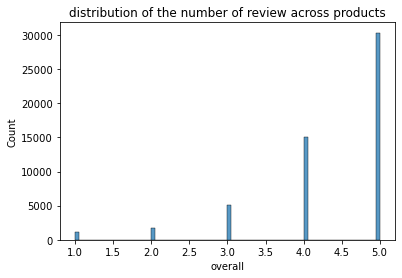

In [21]:
##c. Distribution of the number of reviews across product
fig, ax = plt.subplots()

sns.histplot(df['overall'])
plt.title('distribution of the number of review across products')
plt.show()

Text(0.5, 0, 'Toal number of reviews per product')

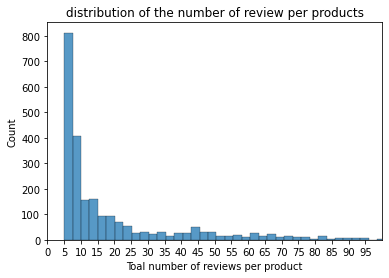

In [24]:
#c. Distribution of the number of reviews per product
# In other words, total number of reviews each products have

temp = df.groupby(['asin']).count()
temp['reviewerID']

fig, ax = plt.subplots()

sns.histplot(temp['reviewerID'])
ax.set_xlim(1,100)
ax.set_xticks(range(0,100,5))
plt.title('distribution of the number of review per products')
plt.xlabel('Toal number of reviews per product')

'''
The histogram shows that most of the products have 5-10 reviews. And the number of
products decreases as the total number of reviews increases
'''

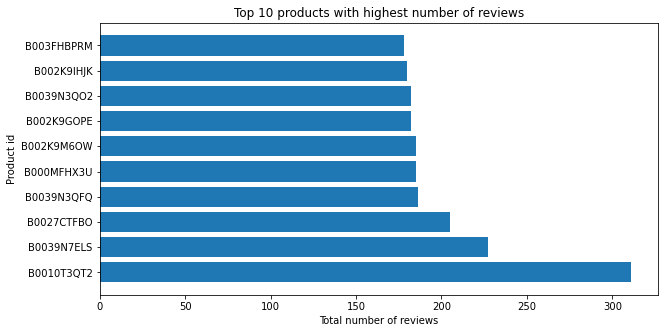

In [25]:
'''Graph below shows top 10 product that has highest number of reviews'''

highest_reviews = temp['reviewerID'].sort_values(ascending= False)[:10]

plt.figure(figsize=(10,5))
plt.barh(highest_reviews.index, highest_reviews.values)
plt.title('Top 10 products with highest number of reviews')
plt.xlabel('Total number of reviews')
plt.ylabel('Product id')
plt.show()

'''
The above bar graph depicts the top 10 products based on highest number of reviews.
Product with id ‘B0010T3QT2’ has more than 300 reviews (highest). Rest top products
has around 200 reviews
'''

In [26]:
#d. Distribution of reviews per user
#In other words, total number of reviews given by each user
temp = df.groupby(['reviewerID']).count()
temp['asin']

reviewerID
A00473363TJ8YSZ3YAGG9     5
A04324702R5O7JRSQNVAH     5
A0678500JUN3N7KUG4PS      7
A100UD67AHFODS            5
A100WO06OQR8BQ           45
                         ..
AZQJ85BTRUQV2             7
AZU2JDR2GVICQ             5
AZYJE40XW6MFG            11
AZZ5ASC403N74            12
AZZD30PYJVGI7             5
Name: asin, Length: 4905, dtype: int64

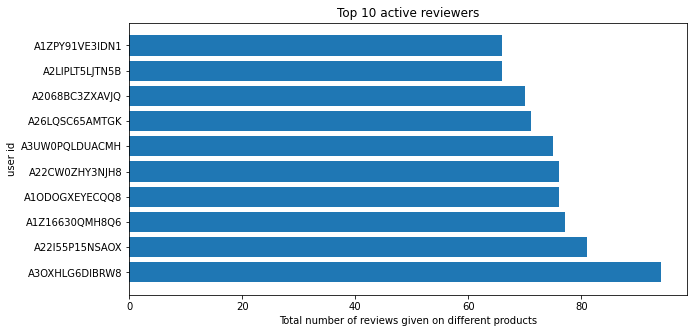

In [18]:
'''Graph below shows top 10 active reviewers'''

top_users = temp['asin'].sort_values(ascending= False)[:10]
plt.figure(figsize=(10,5))
plt.barh(top_users.index, top_users.values)
plt.title('Top 10 active reviewers')
plt.xlabel('Total number of reviews given on different products')
plt.ylabel('user id')
plt.show()

'''
The bar chart represents the top 10 reviewers, and it shows that 1st reviewer has given
around 90 reviews. Other top reviewers have given total reviews of around 70-80. 
'''

In [19]:
#Average rating of each product
temp = df.groupby(['asin']).mean()

print(temp['overall'].iloc[:10])  #Aveage rating for each product

asin
B00000JBLH    4.625000
B00000JBLU    4.888889
B00000JBNX    4.391304
B00000JBO8    4.100000
B00000JFNV    4.727273
B00000JZKB    4.066667
B00000K3T0    5.000000
B00001MXVQ    2.800000
B00002NDS2    4.812500
B00002QUKW    5.000000
Name: overall, dtype: float64


Text(0, 0.5, 'total number of reviews')

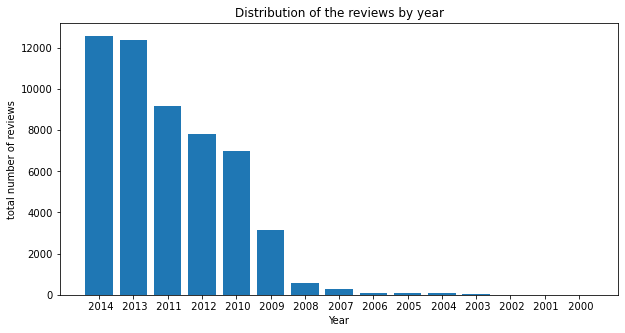

In [20]:
#Distribution of the reviews by year
def take_year(yr):
    temp =yr.split(',')
    return temp[1]

df['year'] = df.apply(lambda row: take_year(row['reviewTime']), axis=1)

yrs = df['year'].value_counts()


plt.figure(figsize=(10,5))
plt.bar(yrs.index, yrs.values)
plt.title('Distribution of the reviews by year')
plt.xlabel('Year')
plt.ylabel('total number of reviews')


'''
From the bar chart, reviews on the products had been increased as the year passed.
These can be happened due to several reasons for example,
1. Number of products might have increased.
2. Number of users might have increased.
'''

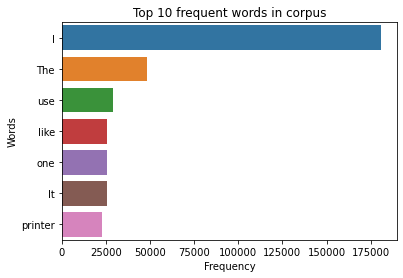

In [22]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    plt.title('Top 10 frequent words in corpus')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    
plot_top_non_stopwords_barchart(df['reviewText'])


'''
Frequently occurring words are shown in the above graph and ‘I’ is occurring the
highest number of times around 1,75,000 times.
Other top frequent words are The, use, like, one, it, and printer
'''

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


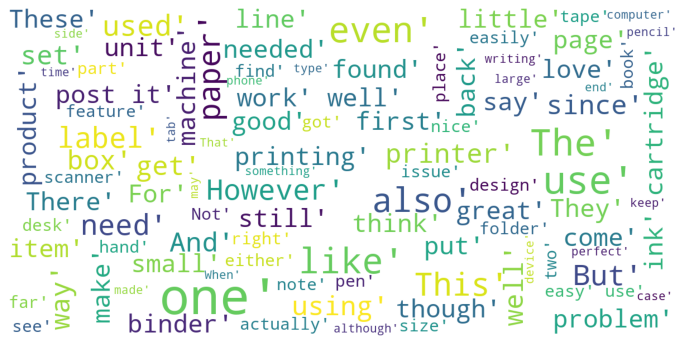

In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

nltk.download('stopwords')
stop=set(stopwords.words('english'))
def plot_wordcloud(text):


    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
    
plot_wordcloud(df['reviewText'])


'''Above picture shows more top frequent words in the corpus. '''

## 2. Text basic pre-processing

In [15]:
df_sample = df.copy()

In [16]:
df_sample.shape

(53258, 11)

In [17]:
df_sample['overall'].value_counts()

5    30327
4    15015
3     5060
2     1726
1     1130
Name: overall, dtype: int64

In [18]:
'''
b. Label data based on the value of “rating of the product” i.e. as follows:
i. Ratings 4,5: Positive
ii. Rating 3: Neutral
iii. Ratings 1,2: Negative
'''

def label_data(rating):
    if rating >3:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [19]:
df_sample['label'] = df_sample.apply(lambda row: label_data(row['overall']), axis=1)


In [20]:
df_sample.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,len_review,len_summary,label
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004",972,39,Positive
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007",5355,62,Positive
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011",495,48,Negative
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006",3648,44,Positive
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013",704,14,Positive


In [21]:
df_sample['label'].value_counts()

Positive    45342
Neutral      5060
Negative     2856
Name: label, dtype: int64

In [22]:
#c. Chose the appropriate columns for your sentiment analyzer. 

df_sample = df_sample[['reviewerID', 'asin','reviewText','summary','overall','label']]

In [23]:
# merging two columns 'reviewText' and 'Summary' to create better corpus of reviews
df_sample['final_text'] = df_sample['reviewText'] + ' ' + df['summary']

In [24]:
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 50)

df_sample[['reviewText','summary','final_text']].head()

,reviewText,summary,final_text
0,"I bought my first HP12C in about 1984 or so, a...","A solid performer, and long time friend","I bought my first HP12C in about 1984 or so, a..."
1,WHY THIS BELATED REVIEW? I feel very obliged t...,"Price of GOLD is up, so don't bury the golden ...",WHY THIS BELATED REVIEW? I feel very obliged t...
2,I have an HP 48GX that has been kicking for mo...,"Good functionality, but not durable like old HPs",I have an HP 48GX that has been kicking for mo...
3,I've started doing more finance stuff recently...,One of the last of an almost extinct species,I've started doing more finance stuff recently...
4,For simple calculations and discounted cash fl...,Still the best,For simple calculations and discounted cash fl...


### 3 Data Clean-up

Implemeting some Text clean-up steps will help model to generate better results and also decrease training and processing time

In [25]:
'''
1) Lowercasing = This clean- up steps converts all words in lowercase. 
This will help to create better text representation using TF-IDF vector (Upcoming section)
It will also decrease total number of unique words that will decrease dimension of training data and will improve efficiency 

''' 

df_sample['final_text'] = df_sample['final_text'].str.lower()

In [26]:
df_sample.head(3)

,reviewerID,asin,reviewText,summary,overall,label,final_text
0,A32T2H8150OJLU,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...","A solid performer, and long time friend",5,Positive,"i bought my first hp12c in about 1984 or so, a..."
1,A3MAFS04ZABRGO,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,"Price of GOLD is up, so don't bury the golden ...",5,Positive,why this belated review? i feel very obliged t...
2,A1F1A0QQP2XVH5,B00000JBLH,I have an HP 48GX that has been kicking for mo...,"Good functionality, but not durable like old HPs",2,Negative,i have an hp 48gx that has been kicking for mo...


In [27]:
'''
2) Remove puncutations - This step removes puncutation from reviews
It will decrease unique number of words and improve efficiency

'''

df_sample['final_text'] = df_sample['final_text'].str.replace('[^\w\s]','', regex=True)

In [28]:
df_sample.head(3)

,reviewerID,asin,reviewText,summary,overall,label,final_text
0,A32T2H8150OJLU,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...","A solid performer, and long time friend",5,Positive,i bought my first hp12c in about 1984 or so an...
1,A3MAFS04ZABRGO,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,"Price of GOLD is up, so don't bury the golden ...",5,Positive,why this belated review i feel very obliged to...
2,A1F1A0QQP2XVH5,B00000JBLH,I have an HP 48GX that has been kicking for mo...,"Good functionality, but not durable like old HPs",2,Negative,i have an hp 48gx that has been kicking for mo...


In [29]:
'''
3) Remove Stopwords excluding negation words = This clean-step removes English grammer words that are not going to
provide any pattern or knowledge while training ML model.
    THis will help to train better model and also decrease processing time

'''

from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

#Modifying set to stopwords: excluding stopwords that contains 'n' in its spelling. So that, while removing stopwords 
#from the corpus, it does not remove words that has 'n' in it. for example, wasn't, shouldn't, not, don'ts 
stops_new = [i for i in stops if "n"  not in i]

In [30]:
stops_new

["that'll",
 'above',
 'here',
 'be',
 'do',
 'them',
 'the',
 'such',
 'if',
 'where',
 'theirs',
 'below',
 'our',
 'most',
 'themselves',
 'this',
 "you'd",
 'very',
 'your',
 'was',
 'its',
 'my',
 'how',
 't',
 'does',
 'a',
 "it's",
 'm',
 's',
 'those',
 'up',
 'which',
 'ourselves',
 'both',
 "she's",
 'over',
 'so',
 'yours',
 'of',
 'you',
 'there',
 'at',
 'had',
 'more',
 'about',
 'itself',
 'as',
 'but',
 'o',
 'his',
 'before',
 'will',
 'i',
 'out',
 're',
 'with',
 'she',
 'whom',
 'he',
 'ours',
 'yourself',
 'these',
 'did',
 'too',
 'her',
 'their',
 'some',
 'myself',
 'each',
 "you'll",
 'after',
 'same',
 'they',
 'what',
 'other',
 'through',
 'herself',
 'should',
 'are',
 'all',
 'it',
 'because',
 'am',
 'or',
 'have',
 'hers',
 'himself',
 'y',
 'ma',
 'few',
 'further',
 "you've",
 'by',
 'were',
 'who',
 "should've",
 'has',
 'from',
 'him',
 'just',
 'is',
 'we',
 "you're",
 'for',
 'while',
 'why',
 'that',
 'd',
 'me',
 'to',
 've',
 'll',
 'yourselves'

In [31]:
df_sample['final_text'] = df_sample['final_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stops_new)]))

In [57]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 50)

df_sample[['final_text']].head(3)

C:\Users\abhip\AppData\Local\Temp/ipykernel_2476/1719832526.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,final_text
27541,wifeour family using hang childrens artwork work wonderfully clean and reuse instruction work perfectly removing hasnt torn anything left any mark on wall pretty impressive given easily construction paper tear seems pretty strong havent used large poster expect would work well simplifies hanging and rehanging paper
40971,product try much and really fails anything well removable binder clunky best and doesnt work well either binder when removed outer jacket flexy plastic material not hard cover would expect on binder and thus lack protection and durability real binder pocket in jacket useful would even useful jacket padded hardcover not flexy soft shell really made 2 separate product and without binder feature since removable binder barely work worst world awkward flexy binder
40579,six year old and installed new epson printer and im definitely no computer genius easy say least thing quite large expected printer can print 13x19 copy finding perfect place put took rearranging furniture six step setup process easy weve bad experience in past trying use installation cd come device went straight epson website downloaded and installed printer driver no problem printer us one black and three color ink cartridge color one look half size blackthe printer only come power cable provide own usb cable connect computer own ethernet cable networking luckily usb cable amongst year saving cable devicesweve made test page and extremely pleased copy crisp even on cheaper copy paper weve found much cost effective print photo an online site and pick in store opposed buying photo quality paper and ink cartridge on top ink cartridgesmany crafting friend different model workforce im planning on using mine in concert craft hobby printing image on fabric printable vinyl and transfer paper able print on fabric ease ironing freezer paper onto back and printing on regular setting planning on using craft need know side printer print on paper default print face down needed know print on fabric and figure marking paper and testing would know print on transfer paper well uploaded picture printer and printed fabric show large and well fabric turned im extremely happy printer already and cant wait try everything else possibly can on excellent printer crafting need


In [33]:
'''
4) Lemmitization = This step converts words in the reviews to its base words
It improves efficiency further and decrease dimension of TF-IDF vector

'''

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
df_sample['final_text'] = df_sample['final_text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [35]:
df_sample.head(3)

reviewerID        asin  \
0  A32T2H8150OJLU  B00000JBLH   
1  A3MAFS04ZABRGO  B00000JBLH   
2  A1F1A0QQP2XVH5  B00000JBLH   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [36]:
'''
5) Shuffle data = In df_sample dataset, instances of all 3 classes are ordered. 
To train un-baised ML model, shuffling dataset is required.
'''

from sklearn.utils import shuffle
df_sample = shuffle(df_sample)

#### Spliting data into training and test data

In [37]:
#d. Split the data into 70% for training and 30% for testing,—Use stratified splitting based on the rating value field.

df_train, df_test = train_test_split(df_sample, test_size=0.30, random_state=1, stratify=df_sample['label'])

In [38]:
df_train['label'].value_counts()

Positive    31739
Neutral     3542 
Negative    1999 
Name: label, dtype: int64

In [39]:
df_test['label'].value_counts()

Positive    13603
Neutral     1518 
Negative    857  
Name: label, dtype: int64

In [40]:
df_sample['label'].value_counts()

Positive    45342
Neutral     5060 
Negative    2856 
Name: label, dtype: int64

# Phase -I (Lexicon approach)

'''
Lexicon approaches are rule-based approaches where predictions are made on certain
rules set in the model. Thus, this type of model does not need training like the Machine learning
model and can be easy to implement, cost-effective, and provides decent accuracy on many use
cases.
Lexicon approach can be implemented by mainly two ways: -
1) Setting and incorporating rules manually from scratch

2) Using packages available that contains already set of rules

In this project, a second option is used, and therefore, two lexicon packages are used to
create a lexicon model for the Sentiment Analysis task.
'''

### i. Valence Aware Dictionary and Sentiment Reasoner (VADR) 

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [42]:
analyzer = SentimentIntensityAnalyzer()

In [43]:
def score_vader(review):
    scores = analyzer.polarity_scores(review)
    compound_score = scores['compound']
    return compound_score

#### for training data

In [44]:
df_train['prediction'] = df_train.apply(lambda row: analyzer.polarity_scores(row['final_text']), axis=1)

In [45]:
df_train['score'] = df_train.apply(lambda row: score_vader(row['final_text']), axis=1)

'''
Try different values(number ) to set threshold for classifiying Positive, Negative and Neutral based on Polarity score recevied by VADR.
And then, use same threshold values on test set and caluclate performance.
'''

In [46]:

df_train.loc[df_train['score'] >= 0.7, 'prediction'] = 'Positive'
df_train.loc[(df_train['score'] > -0.2)  & (df_train['score'] < 0.7), 'prediction'] = 'Neutral'
df_train.loc[df_train['score'] <= -0.2, 'prediction'] = 'Negative'


In [47]:
df_train['prediction'].value_counts()

Positive    29601
Neutral     5913 
Negative    1766 
Name: prediction, dtype: int64

In [48]:
df_train.head(2)

,reviewerID,asin,reviewText,summary,overall,label,final_text,prediction,score
27534,ABC68JUCPTVOE,B0039N7EOA,"Before receiving these Scotch Reusable Mounting Strips, I was struggling to stick posters and signs to my uneven, bumpy walls with the old-school grey mounting putty. I used the putty because, unlike double-sided foam mounting squares, the putty is easily removable. Unfortunately, the wall putty doesn't stick well and is a pain to use (has to be kneaded until warm then squished on wall).These Scotch Reusable strips are the best of both worlds.What I like:* Sticky like foam mounting squares, but removable (almost) like wall putty.* Clear adhesive doesn't mark.* Tacky enough for posters and lightweight signs. Not too tacky for most semi-delicate (painted) walls.* Good price.* Soft enough to stick to uneven walls.* Reusable adhesive can be moved or reused.Other thoughts:* Not the best for dusty brick walls. This is one place wall putty may work better.* Tackiness fades as they pick up dirt upon reuse. Rinsing with water seemed to help.",Big improvement over wall putty,5,Positive,receiving scotch reusable mounting strip struggling stick poster and sign uneven bumpy wall oldschool grey mounting putty used putty unlike doublesided foam mounting square putty easily removable unfortunately wall putty doesnt stick well and pain use kneaded until warm then squished on wallthese scotch reusable strip best worldswhat like sticky like foam mounting square removable almost like wall putty clear adhesive doesnt mark tacky enough poster and lightweight sign not tacky semidelicate painted wall good price soft enough stick uneven wall reusable adhesive can moved reusedother thought not best dusty brick wall one place wall putty may work better tackiness fade pick dirt upon reuse rinsing water seemed help big improvement wall putty,Positive,0.9173
47724,AIVZMEFEAGF3,B00CPXDK2U,"This binder is quite sturdy and feels like it will last me a while. I tend to wear binders out quickly. My favorite aspect is the single-touch trigger that opens all 3 rings. The addition of four interior pockets is very nice and useful. Although I got white, I really love the bright colors they have available. The binder comes with a five-year performance guarantee.",Very well made,5,Positive,binder quite sturdy and feel like last tend wear binder quickly favorite aspect singletouch trigger open 3 ring addition four interior pocket nice and useful although got white really love bright color available binder come fiveyear performance guarantee well made,Positive,0.9681


#### For testing data

In [49]:
# Applying VADER and same threshold set on training data to test data

df_test['score'] = df_test.apply(lambda row: score_vader(row['final_text']), axis=1)

df_test.loc[df_test['score'] >= 0.7, 'prediction'] = 'Positive'
df_test.loc[(df_test['score'] > -0.2)  & (df_test['score'] < 0.7), 'prediction'] = 'Neutral'
df_test.loc[df_test['score'] <= -0.2, 'prediction'] = 'Negative'

In [50]:
df_test['prediction'].value_counts()

Positive    12725
Neutral     2528 
Negative    725  
Name: prediction, dtype: int64

In [51]:
accuracy = accuracy_score(df_test['label'], df_test['prediction'])
f1score = f1_score(df_test['label'], df_test['prediction'], average='macro')
precision = precision_score(df_test['label'], df_test['prediction'], average='macro')
recall = recall_score(df_test['label'], df_test['prediction'], average='macro')

print(f'Accuracy with VADER model: {accuracy}')
print(f'f1_score with VADER model: {f1score}')
print(f'Precision with VADER model: {precision}')
print(f'Recall with VADER model: {recall}')

Accuracy with VADER model: 0.75879334084366
f1_score with VADER model: 0.47557439614159
Precision with VADER model: 0.48388982742470255
Recall with VADER model: 0.47810929790515316


### ii Lexicon Approach - TextBlob

In [52]:
from textblob import TextBlob

In [53]:
def score_Textblob(review):
    wiki = TextBlob(review)
    scores_textblob = wiki.sentiment.polarity
    return scores_textblob


#### For training data

'''
Try different values(number ) to set threshold for classifiying Positive, Negative and Neutral based on Polarity score recevied by VADR.
And then, use same threshold values on test set and caluclate performance.
'''

In [54]:
df_train['score'] = df_train.apply(lambda row: score_Textblob(row['final_text']), axis=1)

In [55]:

df_train.loc[df_train['score'] >= 0.15, 'prediction'] = 'Positive'
df_train.loc[(df_train['score'] > 0.05)  & (df_train['score'] < 0.15), 'prediction'] = 'Neutral'
df_train.loc[df_train['score'] <= 0.05, 'prediction'] = 'Negative'

In [56]:
df_train['prediction'].value_counts()

Positive    24942
Neutral     8206 
Negative    4132 
Name: prediction, dtype: int64

#### For testing data

In [212]:

df_test['score'] = df_test.apply(lambda row: score_Textblob(row['final_text']), axis=1)

df_test.loc[(df_test['score'] > 0.15), 'prediction'] = 'Positive'
df_test.loc[(df_test['score'] > 0.05)  & (df_test['score'] < 0.15), 'prediction'] = 'Neutral'
df_test.loc[df_test['score'] <= 0.05, 'prediction'] = 'Negative'

df_test['prediction'].value_counts()

Positive    2921
Neutral     1482
Negative    972 
Name: prediction, dtype: int64

In [213]:
accuracy = accuracy_score(df_test['label'], df_test['prediction'])
f1score = f1_score(df_test['label'], df_test['prediction'], average='macro')
precision = precision_score(df_test['label'], df_test['prediction'], average='macro')
recall = recall_score(df_test['label'], df_test['prediction'], average='macro')

print(f'Accuracy with TextBlob model: {accuracy}')
print(f'f1_score with TextBlob model: {f1score}')
print(f'Precision with TextBlob model: {precision}')
print(f'Recall with TextBlob model: {recall}')

Accuracy with TextBlob model: 0.5637209302325581
f1_score with TextBlob model: 0.5040982891180836
Precision with TextBlob model: 0.49978394244657304
Recall with TextBlob model: 0.5097281992467929


# phase -2 (Machine Learning Approach)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

### train_test_split

In [59]:
#d. Split the data into 70% for training and 30% for testing,—Use stratified splitting based on the rating value field.

X_train, X_test, y_train, y_test = train_test_split(df_sample['final_text'], df_sample['label'], test_size=0.30, random_state=1, stratify=df_sample['label'])

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37280,), (15978,), (37280,), (15978,))

### Text representation: Represent  text using one of the approaches.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,2))

In [63]:
X_train = tfidf.fit_transform(X_train)  #Creating tfidf_matrix of training data

In [64]:
X_test = tfidf.transform(X_test) #Creating tfidf_matrix of testing data

In [65]:
X_train.shape, X_test.shape

((37280, 5000), (15978, 5000))

### Applying label encoding on the labels to convet it into number from texts

In [66]:
enc = LabelEncoder()
actual_labels=enc.fit_transform(y_train)  #Converting training labels to numbers

In [67]:
actual_labels_test = enc.transform(y_test) #Converting testing labels to numbers

In [68]:
pd.DataFrame(actual_labels).value_counts()

2    31739
1    3542 
0    1999 
dtype: int64

### Handling imbalanced dataset

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm = SMOTE(random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train,actual_labels)

In [71]:
X_train = oversampled_X.copy()
y_train = oversampled_Y.copy()

In [72]:
pd.DataFrame(y_train).value_counts()

0    31739
1    31739
2    31739
dtype: int64

## Naïve Bayes

In [364]:
nb = MultinomialNB(alpha=0.1).fit(X_train, y_train)

In [365]:
pred_nb = nb.predict(X_test)

#### Testing the performance of Naïve Bayes

In [366]:
acc_nb = accuracy_score(actual_labels_test, pred_nb)
precision_nb = precision_score(actual_labels_test, pred_nb, average='weighted')
recall_nb = recall_score(actual_labels_test, pred_nb, average= 'weighted')
f1_nb = f1_score(actual_labels_test, pred_nb, average= 'weighted')
cm_nb = confusion_matrix(actual_labels_test, pred_nb)

print(f'Accuracy using Naïve Bayes: {acc_nb}')
print(f'Precision using Naïve Bayes: {precision_nb}')
print(f'Recall using Naïve Bayes: {recall_nb}')
print(f'F1 using Naïve Bayes: {f1_nb}')
print(f'Confusion Matrix using Naïve Bayes: {cm_nb}')

Accuracy using Naïve Bayes: 0.6940167730629616
Precision using Naïve Bayes: 0.8534890912973694
Recall using Naïve Bayes: 0.6940167730629616
F1 using Naïve Bayes: 0.747101908383856
Confusion Matrix using Naïve Bayes: [[ 513  286   58]
 [ 308  876  334]
 [1500 2403 9700]]


## Logistic Regression

In [367]:
lg_sag = LogisticRegression(solver='lbfgs', max_iter=2000).fit(X_train,y_train)


In [368]:
pred_sag = lg_sag.predict(X_test)

#### Testing performance of Logistic Regression

In [369]:
acc_sag = accuracy_score(actual_labels_test, pred_sag)
precision_sag = precision_score(actual_labels_test, pred_sag, average='weighted')
recall_sag = recall_score(actual_labels_test, pred_sag, average= 'weighted')
f1_sag = f1_score(actual_labels_test, pred_sag, average= 'weighted')
cm_sag = confusion_matrix(actual_labels_test, pred_sag)

print(f'Accuracy using Naïve Bayes: {acc_sag}')
print(f'Precision using Naïve Bayes: {precision_sag}')
print(f'Recall using Naïve Bayes: {recall_sag}')
print(f'F1 using Naïve Bayes: {f1_sag}')
print(f'Confusion Matrix using Naïve Bayes:\n {cm_sag}')

Accuracy using Naïve Bayes: 0.8032294404806609
Precision using Naïve Bayes: 0.8629448786756962
Recall using Naïve Bayes: 0.8032294404806609
F1 using Naïve Bayes: 0.8264277190347572
Confusion Matrix using Naïve Bayes:
 [[  528   232    97]
 [  269   793   456]
 [  507  1583 11513]]


#### Gradient Boosting

In [252]:
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_features=2, max_depth=None, random_state=0)

In [253]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=None, max_features=2,
                           n_estimators=200, random_state=0)

In [254]:
pred_gb = gb_clf.predict(X_test)

In [255]:
acc_gb = accuracy_score(actual_labels_test, pred_gb)
precision_gb = precision_score(actual_labels_test, pred_gb, average='weighted')
recall_gb = recall_score(actual_labels_test, pred_gb, average='weighted')
f1_gb = f1_score(actual_labels_test, pred_gb, average='weighted')
cm_gb = confusion_matrix(actual_labels_test, pred_gb)

print(f'Accuracy using Gradient Boosting: {acc_gb}')
print(f'Precision using Gradient Boosting: {precision_gb}')
print(f'Recall using Gradient Boosting: {recall_gb}')
print(f'F1 using Gradient Boosting: {f1_gb}')
print(f'Confusion Matrix using Gradient Boosting: {cm_gb}')

Accuracy using Gradient Boosting: 0.5886511627906976
Precision using Gradient Boosting: 0.5774197219356896
Recall using Gradient Boosting: 0.5886511627906976
F1 using Gradient Boosting: 0.5038662313742945
Confusion Matrix using Gradient Boosting: [[ 119   69  669]
 [  37  205 1276]
 [  26  134 2840]]


#### Random Forest

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
rf = RandomForestClassifier(n_estimators=1000)

In [307]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [308]:
pred_rf = rf.predict(X_test)

In [310]:
acc_rf = accuracy_score(actual_labels_test, pred_rf)
precision_rf = precision_score(actual_labels_test, pred_rf, average='weighted')
recall_rf = recall_score(actual_labels_test, pred_rf, average='weighted')
f1_rf = f1_score(actual_labels_test, pred_rf, average='weighted')
cm_rf = confusion_matrix(actual_labels_test, pred_rf)

print(f'Accuracy using Gradient Boosting: {acc_rf}')
print(f'Precision using Gradient Boosting: {precision_rf}')
print(f'Recall using Gradient Boosting: {recall_rf}')
print(f'F1 using Gradient Boosting: {f1_rf}')
print(f'Confusion Matrix using Gradient Boosting:\n {cm_rf}')

Accuracy using Gradient Boosting: 0.6437209302325582
Precision using Gradient Boosting: 0.6306642478328236
Recall using Gradient Boosting: 0.6437209302325582
F1 using Gradient Boosting: 0.6273674965985172
Confusion Matrix using Gradient Boosting:
 [[ 314  209  334]
 [ 102  649  767]
 [  88  415 2497]]


'''
Precision, recall and f1-score are better performance measure when problem has imbalanced dataset.
Becuase accuracy just shows proportion of total number of correct predition to the total prediction made. Model only performing 
good on bigger class will also give higher accuracy and it can be miss leading
'''

''' F1-score is weighted mean of precision and recall. Therefore, f1-score alone can provide better insight of model performance easily.'''

'''
It can be noticed that Logistic Regression and SVM is performing better than RandomForest, GradientBoosting and Naive Bayes 
Therefore, Fine-tuning Logistiv Regression in next section to find best hyper parameters
'''

### Fine- tuning - RandomizedSearchCV

In [371]:
from sklearn.model_selection import RandomizedSearchCV

In [384]:
param_grid = { 'solver': ['sag','lbfgs'],
            'C': np.logspace(-4, 4, 50),
             'penalty':['l2']}

clf = RandomizedSearchCV(LogisticRegression(max_iter=3000), param_grid,cv=5, verbose=0,n_jobs=-1)

In [385]:
best_model = clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [386]:
print(best_model.best_estimator_)
print(best_model.best_params_)
print("The mean accuracy of the model is:",best_model.score(X_train,y_train))

LogisticRegression(C=1048.1131341546852, max_iter=3000)
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1048.1131341546852}
The mean accuracy of the model is: 0.9745948727643173


In [387]:
pred_lg = best_model.predict(X_test)

In [388]:
acc_lg = accuracy_score(actual_labels_test, pred_lg)
precision_lg = precision_score(actual_labels_test, pred_lg, average='weighted')
recall_lg = recall_score(actual_labels_test, pred_lg, average='weighted')
f1_lg = f1_score(actual_labels_test, pred_lg, average='weighted')
cm_lg = confusion_matrix(actual_labels_test, pred_lg)

print(f'Accuracy using Gradient Boosting: {acc_lg}')
print(f'Precision using Gradient Boosting: {precision_lg}')
print(f'Recall using Gradient Boosting: {recall_lg}')
print(f'F1 using Gradient Boosting: {f1_lg}')
print(f'Confusion Matrix using Gradient Boosting:\n {cm_lg}')

Accuracy using Gradient Boosting: 0.7970334209538115
Precision using Gradient Boosting: 0.8367118485632697
Recall using Gradient Boosting: 0.7970334209538115
F1 using Gradient Boosting: 0.8141974097097454
Confusion Matrix using Gradient Boosting:
 [[  428   236   193]
 [  229   590   699]
 [  442  1444 11717]]
